In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load Image
PATH = './data/1.jpg'

In [98]:
image = cv2.imread(PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

image = 255 - image
# kernel = np.ones((5,5), np.uint8)
# image = cv2.erode(image, kernel, iterations=1)

In [99]:
height, width = image.shape
hist_array = [0]*width

In [100]:
for w in range(width):
    for h in range(height):
        if image[h][w] == 0:
            hist_array[w] += 1
        


In [101]:
print(hist_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 24, 7, 8, 7, 4, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 7, 14, 8, 19, 7, 4, 5, 4, 4, 6, 6, 3, 5, 7, 12, 1, 1, 1, 1, 9, 7, 8, 5, 6, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 3, 4, 6, 9, 1, 1, 1, 1, 1, 2, 3, 3, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


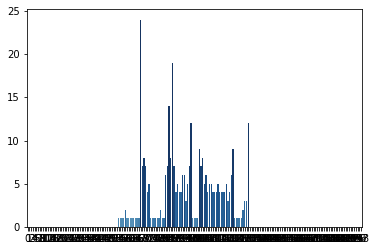

In [102]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(width)] 

pal = sns.color_palette("Blues", len(langs))
rank = np.array(hist_array).argsort().argsort()  # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=langs, y=hist_array, palette=np.array(pal)[rank])

True

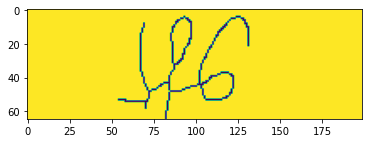

In [103]:
plt.imshow(image)
cv2.imwrite('img.jpg', image)

In [104]:
# Find local min
points = hist_array[hist_array == 1]

In [105]:
points

0

In [106]:
indexes = [i for i, e in enumerate(hist_array) if  e ==1] 

In [107]:
img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
height = image.shape[0]
for i in indexes:
    for h in range(height):
        img[h][i] = (255, 0, 0) 
cv2.imwrite('psc.jpg', img)

True

In [108]:
print(indexes)

[54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 73, 74, 75, 76, 77, 78, 80, 81, 98, 99, 100, 101, 123, 124, 125, 126, 127]


In [109]:
groups = []
start = -1
end = -1
prev = 0
for i, ind in enumerate(indexes):
    if start == -1:
        start = ind
        end = ind 
        continue
    if end + 2 < ind:
        groups.append((start, end))
        start = ind
    end = ind
        
        
        
    

In [110]:
print(groups)

[(54, 66), (73, 81), (98, 101)]


In [111]:
for w in range(width):
    for h in range(height):
        for g in groups:
            if w >= g[0] and w <= g[1]:
                image[h][w] = 255


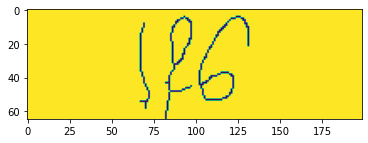

In [112]:
plt.imshow(image)